# Workshop 9a Hypothesis Testing

**Due by 9 pm April 15, 2025**

In our recent lectures, we discussed the example of interpreting the outcome of the Stern Gerlach experiment. In this exercise, you will develop the code to perform the hypothesis testing and measurement of the probability parameter $p$ (the probability for atoms to end up at the upper position after passing through the magnetic field).


# Part-1 Hypothesis Testing


## Visualize Binomial Function

Below is a code cell used to generate the plot included in the lecture slides. Use it as an example, and produce a plot to visualize
- a Binomial PDF where N = 4000 and p = 0.5
- a Binomial PDF where N = 4000 and p = 0.475
- a Binomial PDF where N = 4000 and p = 0.525

Other requirements
- Overlay the three functions in the same plot
- Set the Y axis to logarithmic scale (google search if you are not sure what to do here). Then turn it off to see the difference between the linear scale plot and the log scale one.
- In a markdown cell, report the standard deviation of each of these functions.

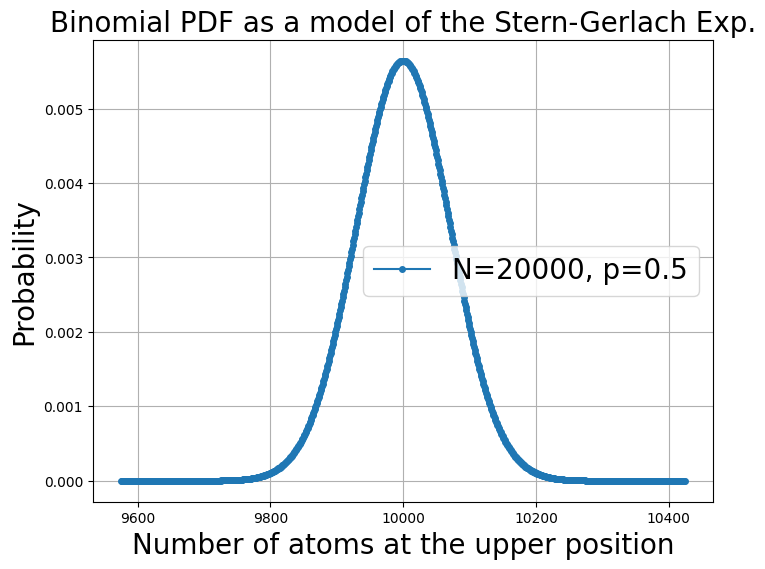

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
N = 20000
p = 0.5

# Mean and standard deviation for the binomial distribution
mu = N * p
sigma = np.sqrt(N * p * (1-p))

# Adjusted range
k_min = int(mu - 6*sigma)
k_max = int(mu + 6*sigma)

# Values
k = np.arange(k_min, k_max+1)
probabilities = binom.pmf(k, N, p)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(k, probabilities, 'o-', markersize=4, label=f'N={N}, p={p}')
plt.title('Binomial PDF as a model of the Stern-Gerlach Exp.',fontsize=20)
plt.xlabel('Number of atoms at the upper position',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()


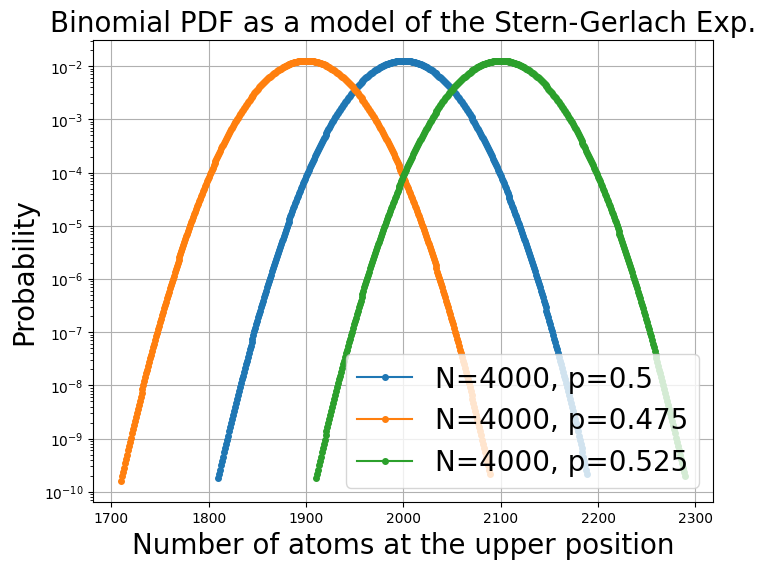

Standard deviation for p = 0.5: 31.6228
Standard deviation for p = 0.475: 31.5832
Standard deviation for p = 0.525: 31.5832


In [9]:
# Your code here
def binomial_pdf(N, p):
  mu = N * p
  sigma = np.sqrt(N * p * (1-p))

  # Adjusted range
  k_min = int(mu - 6*sigma)
  k_max = int(mu + 6*sigma)

  # Values
  k = np.arange(k_min, k_max+1)
  probabilities = binom.pmf(k, N, p)
  return k, probabilities, sigma

k1, binomial1, sigma1 = binomial_pdf(4000, 0.5)
k2, binomial2, sigma2 = binomial_pdf(4000, 0.475)
k3, binomial3, sigma3 = binomial_pdf(4000, 0.525)

plt.figure(figsize=(8, 6))
plt.plot(k1, binomial1, 'o-', markersize=4, label=f'N={4000}, p={0.5}')
plt.plot(k2, binomial2, 'o-', markersize=4, label=f'N={4000}, p={0.475}')
plt.plot(k3, binomial3, 'o-', markersize=4, label=f'N={4000}, p={0.525}')

plt.title('Binomial PDF as a model of the Stern-Gerlach Exp.',fontsize=20)
plt.xlabel('Number of atoms at the upper position',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.yscale('log')
plt.legend(fontsize=20)
plt.grid(True)
plt.show()
print(f'Standard deviation for p = 0.5: {sigma1:.4f}')
print(f'Standard deviation for p = 0.475: {sigma2:.4f}')
print(f'Standard deviation for p = 0.525: {sigma3:.4f}')

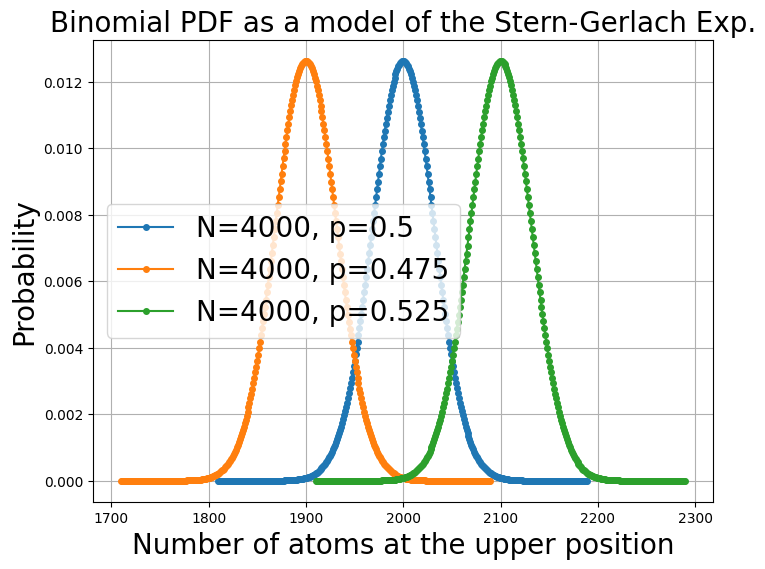

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(k1, binomial1, 'o-', markersize=4, label=f'N={4000}, p={0.5}')
plt.plot(k2, binomial2, 'o-', markersize=4, label=f'N={4000}, p={0.475}')
plt.plot(k3, binomial3, 'o-', markersize=4, label=f'N={4000}, p={0.525}')

plt.title('Binomial PDF as a model of the Stern-Gerlach Exp.',fontsize=20)
plt.xlabel('Number of atoms at the upper position',fontsize=20)
plt.ylabel('Probability',fontsize=20)

plt.legend(fontsize=20)
plt.grid(True)
plt.show()

**Your answers here**  
Standard deviation for p = 0.5: 31.6228  
Standard deviation for p = 0.475: 31.5832  
Standard deviation for p = 0.525: 31.5832

In one case, someone conducted the experiment and collected data for 4,000 atoms. Their observation is that k = 2023, i.e., 2023 atoms, out of 4,000 sent through the magnetic field, went up. We want to use this observation to test the hypothesis that p = 0.475. We will do this step-by-step.

## Generate P.E.s
First, we need to generate pseudo experiments from the hypothesis under test. We model the outcome of this experiment with a binomial PDF where N = 4000, and our hypothesis is p = 0.475. Our pseudo experiments are outcomes following the PDF of the hypothesis under test. The binomial PDF tells you the probability of having an outcome of k (k atoms ending up at the upper position) given N and p. We need to repeatedly draw random numbers from this binomial PDF. Each time we draw a random number from the binomial PDF, we are repeating the experiment of **sending 4000 atoms through the magnetic field** (not the experiment sending one atom through the field). Because we run pseudo experiments, we can run as many as we want. So let's do it M = 1,000,000 times. You need to complete the cell below to do the P.E. generation under the hypothesis of = 0.475, and at the end of it, you will have a numpy array to store the P.E. outcomes.

Type of pe_outcomes: <class 'numpy.ndarray'>
Size (shape) of pe_outcomes: (1000000,)


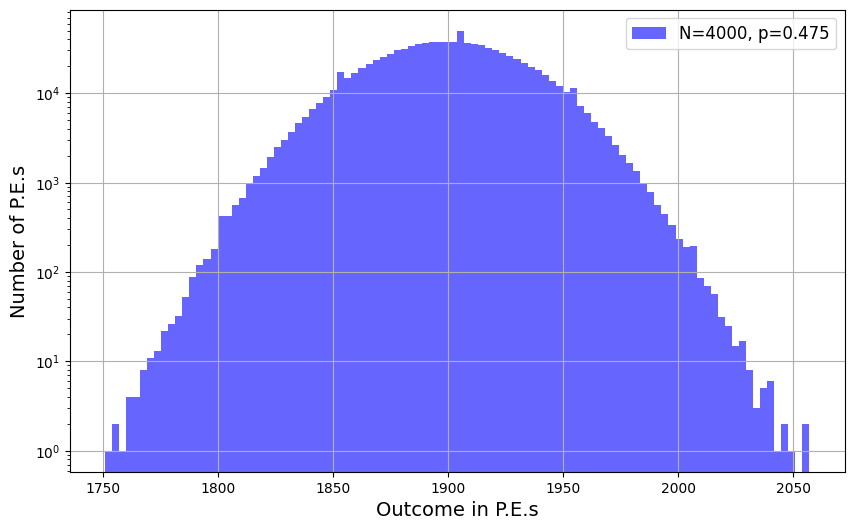

In [11]:
# Complete the cell below

import numpy as np
from scipy.stats import binom

# Parameters
N = 4000 # Total number of trials
p_hypothesis = 0.475  # Hypothesized value of p
M = 1e6  # Number of pseudo-experiments

# how do you plug in the three varialbes defined above?
pe_outcomes = np.random.binomial(N, p_hypothesis, int(M))

# Print type, size, and values of pe_outcomes
print("Type of pe_outcomes:", type(pe_outcomes))
print("Size (shape) of pe_outcomes:", pe_outcomes.shape)

# Plot a histogram of the pseudo-experiment outcomes
plt.figure(figsize=(10, 6))
plt.hist(pe_outcomes, bins=100, density=False, alpha=0.6, color='b', label=f'N={N}, p={p_hypothesis}')

# Configure plot labels and legend

plt.xlabel('Outcome in P.E.s', fontsize=14)
plt.ylabel('Number of P.E.s', fontsize=14)
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid(True)

# Show the plot
plt.show()


Now that we have the P.E. outcomes, we can determine how frequent the outcomes of the hypothesis of p = 0.475 can be at least as large as the observed outcome $k = 2023$. In practice, you need to calculate the number of entries in the PE outcome array that are greater than 2023, and then take the ratio of that to the total number of P.E.s. Perform your calculation in the cell below, and summarize your result in a markdown cell.

**N.B. the quantity you calculated here is known as the $p-$value, not to be confused with the p parameter in the binomial PDF. The $p-$value the probability of the outcome from your hypothesis under test to be at least as extreme as the actual observed outcome.**

In [12]:
# Your code here
num_greater_than_2023 = np.sum(pe_outcomes > 2023)
p_value = num_greater_than_2023 / len(pe_outcomes)
print(f"P-value: {p_value:.4f}")

P-value: 0.0001


**Summarize your result**  
the p-value of my hypothesis is 0.0001

The concept of $p$-value is closely related to the significance. $p-$value quantifies the probability of the hypothesis under test to produce an outcome at least as extreme as the observed outcome, while the significance measures the same probability but instead presents it as a number of standard deviations away from the hypothesis under test. In practice, we often **conventionally** assume the relation between the p-value and significance follow that in the Gaussian case. We can convert the p-value to significance and vice versa. You can see the example below.

In [13]:
# this code cell will use the p_value you defined in the previous cell as input
# What is the significance of "rejecting" the p=0.475 hypothesis?
import scipy.stats as stats

# Function to convert p-value to z-score
def p_value_to_significance(p_value):
    return -stats.norm.ppf(p_value / 2)

# Function to convert z-score to p-value
def significance_to_p_value(z):
    return 2 * (1 - stats.norm.cdf(abs(z)))

# Example: Convert p-value to significance

significance = p_value_to_significance(p_value)
print(f"P-value: {p_value}, significance: {significance:.4f}")

# Example: Convert z-score to p-value
z = 2.0  # Example z-score
p_value_example = significance_to_p_value(z)
print(f"Z-score: {significance}, P-value: {p_value_example:.4f}")


P-value: 6e-05, significance: 4.0128
Z-score: 4.012810811118254, P-value: 0.0455


## Your Exercise

Now that you have walked through the example of hypothesis test. You can do your own test. In this exercise, follow the above procedure to test the hypothesis of p = 0.525 using the observed outcome of k = 2023. Report the p-value of this test and the significance of rejecting the hypothesis of p=0.525 in a markdown cell.

**N.B.** the hypothesis of p = 0.525 would lead to an average of k = 2100 which is greater than the observed k of 2023. In this case, the probability for you to test is the one that the outcome of the p = 0.525 hypothesis to be equal to or smaller than k = 2023.

In [14]:
# your code
N = 4000 # Total number of trials
p_hypothesis = 0.525  # Hypothesized value of p
M = 1e6  # Number of pseudo-experiments

# how do you plug in the three varialbes defined above?
pe_outcomes = np.random.binomial(N, p_hypothesis, int(M))

num_smaller_than_2023 = np.sum(pe_outcomes < 2023)
p_value = num_smaller_than_2023 / len(pe_outcomes)
print(f"P-value: {p_value:.4f}")
print(f'significane: {p_value_to_significance(p_value):.4f}')



P-value: 0.0071
significane: 2.6911


**Summarize your results**  
P-value: 0.0071  
significane: 2.6911

# Part 2. Log Likelihood Ratio as a Test Statistic

Test statistic is a numerical measure to characterize an experimental outcome. In this example, we will construct a log likelihood ratio test statistic, and we will use it to perform a hypothesis test.

Building upon the part 1, let's first see how we can construct a log likelihood ratio for that experiment. A log likelihood ratio is defined as

$\large
    \lambda = \mathrm{ln}\frac{L_0}{L_1} = \mathrm{ln}{L_0} - \mathrm{ln}{L_1}
$

where $L_0$ and $L_1$ are the likelihood functions for two different hypotheses, $H0$ and $H1$. Often one hypothesis is referred to as a null hypothesis, and the other as an alternative hypothesis. These hypothese are chosen by you. The null hypothesis is typically the one expected, and the alternative hypothesis tends to be the one that's a bit more speculative. In this case, we can choose p = 0.5 as the null hypothesis (H0) and p = 0.525 as the alternative hypothesis (H1).

## Implementing Log Likliehood and Log Likelihood Ratio

For common PDFs, scipy.stats provided functions to determine the logarithmic value of the PDF/likelihood. Let's see the example below.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
N = 4000  # Total number of trials
p_hypothesis = 0.475  # Hypothesized value of p
k = 2023

binomial_pmf = binom.pmf(k, N, p_hypothesis)

# Print type, size, and values of binomial_pmf
print("Type of binomial_pmf:", type(binomial_pmf))
print("Size (shape) of binomial_pmf:", binomial_pmf.shape)
print("Values of binomial_pmf:")
print(binomial_pmf)

Type of binomial_pmf: <class 'numpy.float64'>
Size (shape) of binomial_pmf: ()
Values of binomial_pmf:
6.4883754936782976e-06


In [16]:
# Calculate the logarithm of the binomial PMF (logPMF)
log_binomial_pmf = np.log(binomial_pmf)

# Print type, size, and values of log_binomial_pmf
print("Type of log_binomial_pmf:", type(log_binomial_pmf))
print("Size (shape) of log_binomial_pmf:", log_binomial_pmf.shape)
print("Values of log_binomial_pmf:")
print(log_binomial_pmf)

Type of log_binomial_pmf: <class 'numpy.float64'>
Size (shape) of log_binomial_pmf: ()
Values of log_binomial_pmf:
-11.945498367721315


In [17]:
# here we directly use the logpmf function of scipy.stats

log_binomial_pmf = binom.logpmf(k, N, p_hypothesis)

# Print type, size, and values of log_binomial_pmf
print("Type of log_binomial_pmf:", type(log_binomial_pmf))
print("Size (shape) of log_binomial_pmf:", log_binomial_pmf.shape)
print("Values of log_binomial_pmf:")
print(log_binomial_pmf)

Type of log_binomial_pmf: <class 'numpy.float64'>
Size (shape) of log_binomial_pmf: ()
Values of log_binomial_pmf:
-11.94549836771921


Now, let's generalize this to an experiment with multiple observed outcomes. For example, one experiment consists of two independently conducted Stern Gerlach experiments, A and B (just like the one explained during the lecture), the observed outcome is $k_A = 2023$ and $k_B$ = 1995.

The likelihood function for this experiment is

$
\large L(k_A, k_B, N_A, N_b, p) = f_{binomial}(k_A, N_A, p)*f_{binomial}(k_B, N_B,p)
$

and the log likelihood function is then

$
\large \mathrm{ln}{L(k_A, k_B, N_A, N_b, p)} = \mathrm{ln}(f_{binomial}(k_A, N_A, p)) + \mathrm{ln}(f_{binomial}(k_B, N_B, p))
$

Let's implement the log likleihood of this observation.

In [18]:
# the observed outcome is stored as a 1D array with a shape of (2,)
k = np.array([2023,1995])

# what are the type and shape for k, N, and p_hypothesis?
# what are the type and shape for the returning argument?
log_binomial_pmf = binom.logpmf(k, N, p_hypothesis)


# Print type, size, and values of log_binomial_pmf
print("Type of log_binomial_pmf:", type(log_binomial_pmf))
print("Size (shape) of log_binomial_pmf:", log_binomial_pmf.shape)
print("Values of log_binomial_pmf:")
print(log_binomial_pmf)


Type of log_binomial_pmf: <class 'numpy.ndarray'>
Size (shape) of log_binomial_pmf: (2,)
Values of log_binomial_pmf:
[-11.94549837  -8.8912187 ]


As you can see the returning argument of the line `log_binomial_pmf = binom.logpmf(k, N, p_hypothesis)` is not a scalar. It has a shape of (2,). The log likelihood is a single-valued quantity. The two entries in `log_binomial_pmf` are corresponding to the two terms $\mathrm{ln}(f_{binomial}(k_A, N_A, p))$ and$ \mathrm{ln}(f_{binomial}(k_B, N_B, p))$. You need to add them up.

In [19]:
log_likelihood = log_binomial_pmf.sum()

Now develop your code to calculate the log likelihood ratio of $\lambda = -2\mathrm{ln}\frac{L_0}{L_1}$. Here you need to calculate the log likelihood of the observed outcome (kA and kB) for the null hypothesis and the alternative hypothesis, separately. Then their difference is the log likelihood ratio.

In [21]:
# Your code
N = 4000  # Total number of trials
p_hypothesis_0 = 0.5  # Hypothesized value of p
p_hypothesis_1 = 0.525  # Hypothesized value of p
k = np.array([2023,1995])



# Calculate the log likelihood for the null hypothesis (p = 0.5)
LLH0 = log_binomial_pmf_0 = binom.logpmf(k, N, p_hypothesis_0)
# Calculate the log likelihood for the alternative hypothesis (p = 0.525)
LLH1 = log_binomial_pmf_1 = binom.logpmf(k, N, p_hypothesis_1)

# Calculate the log likelihood ratio (LLR) between H0 and H1
LLR = -2*(LLH0 - LLH1)

# Print the log likelihood values and log likelihood ratio
print("Log Likelihood for H0 (p = 0.5):", LLH0)
print("Log Likelihood for H1 (p = 0.525):", LLH1)
print("Log Likelihood Ratio (LLR) between H0 and H1:", LLR)


Log Likelihood for H0 (p = 0.5): [-4.63731838 -4.38537556]
Log Likelihood for H1 (p = 0.525): [-7.34165927 -9.89205329]
Log Likelihood Ratio (LLR) between H0 and H1: [ -5.40868178 -11.01335546]


# Part 3 Hypothesis Test using the log likelihood ratio

Now that you can generate P.E.s and you can construct a log likelihood ratio, use them to perform a hypothesis test. Our experiment consists of five group of students who performed statistically independent data collection of the Stern-Gerlach experiment. Their observed number atoms at the upper position are 2005, 1990, 1991, 2015, 1995. For these five independent measurements, their total numbers of atoms sent through the magentic field are also different. They are 4002, 3995,3994,4004,4005. Given this observation of five independent measurement resutlts, what are the p-value and significance of the hypothesis of p = 0.51?

Here is a roadmap for you to implement this test:

1. each experiment has five statistically independent observations, and as such, you should use arrays of shape (1,5) to store the observed and P.E. outcomes, and the total number of atoms. These arrays are shaped to (1,5) so that each entry on axis 0 would be corresponding to one experiment, and each entry on axis 1 would be corresponding to one of the five observations made within in one experiment. Later, when you generate M number of P.E.s, the P.E.s can be stored in an array of shape (M,5) where you M entries on axis 0 corresponding to the M P.E.s.

2. define a function to calculate the log likelihood for a given outcome, total number of atoms, and hypothesized value of p. This function can take the arrays of shape (1,5) as input arguments. Make sure the returning arugment is a scalar. For the observed outcome, identify the value of parameter $p$ that maximized the log likelihood.

3. Generate P.E.s using the hypothesis under test. In this case, generate P.E.s with p = 0.51. You want to see how frequent outcomes of p = 0.51 become as extreme as the observed outcome.

4. For each P.E. outcome, calculate their log likelihod raito, with H0 being p=0.5, and H1 being p = 0.51. To help you understand the P.E. outcomes, draw the log likelihood ratio distribution of these P.E.s, and also use a vertical line to indicate the log likelihood ratio value of the acutal observed outcome.

5. Determine the p-value and significance. Calculate the fraction of P.E.s that are more extreme than the observed outcome. Integrate the tail area under the curve starting from the log likelihood ratio value of the actual observed outcome. The p-value is this area over the total area under the curve. Convert your p-value to significance. Report both.

In [24]:
# Code for step 1
N = [[4002, 3995, 3994, 4004, 4005]]
k = [[2005, 1990, 1991, 2015, 1995]]
M = 1e6

In [26]:
# Code for step 2
def log_likelihood(k, N, p_hypothesis):
  log_binomial_pmf = binom.logpmf(k, N, p_hypothesis)
  log_likelihood = log_binomial_pmf.sum()
  return log_likelihood

ps = np.arange(0,1,0.01)
p_likelihoods = [log_likelihood(k, N, p) for p in ps]
print(ps[np.argmax(p_likelihoods)])


0.5


In [29]:
# Code for step 3
PEs = np.random.binomial(N, 0.51, (int(M),5))
print(PEs.shape)
for i in range(5):
  mean_value = np.mean(PEs[:, i])
  if k[i] < mean_value:
    num_extreme = np.sum(PEs[:, i] < k[i])
  else:
    num_extreme = np.sum(PEs[:, i] > k[i])
  p_values = num_extreme / M
  print(p_values)

(1000000, 5)


In [ ]:
# Code for step 4
log_likelihood_ratios = []
for i in range(1000000):
  PE = PEs[i]
  log_likelihood_ratio = log_likelihood(PE, N, 0.5) - log_likelihood(PE, N, 0.51)
  log_likelihood_ratios.append(log_likelihood_ratio)
real = log_likelihood(k, N, 0.51)
plt.figure(figsize=(10, 6))
plt.hist(log_likelihood_ratios, bins=100, density=False, alpha=0.6, color='b', label=f'N={N}, p={0.51}')
plt.axvline(x=real, color='r', linestyle='--', label='Observed Outcome')
plt.xlabel('Log Likelihood Ratio', fontsize=14)
plt.ylabel('Number of P.E.s', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Code for step 5

# Disclosure of use of AI technologies
State whether you used any AI technologies to complete this assignment. If you did, explain how you used them. Failure to answer this question will result in a grade of zero for the assignment.

Your statment -  
I use AI to generate some repetitive code, and I check and understand them.